In [7]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [8]:
# Importing the dataset

df = pd.read_csv('wine_data.csv', header=None, usecols=[0,1,2])
df.columns=['Class_label', 'Alcohol', 'Malic Acid']
df.sample(5)

,Class_label,Alcohol,Malic Acid
18,1,14.19,1.59
148,3,13.32,3.24
127,2,11.79,2.13
15,1,13.63,1.81
119,2,12.00,3.43


<AxesSubplot:xlabel='Alcohol', ylabel='Malic Acid'>

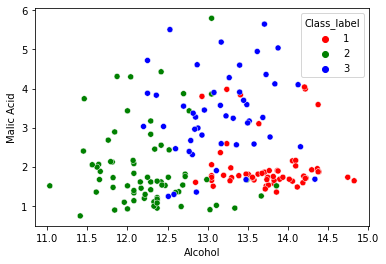

In [9]:
color_dict={1:'red', 2:'green', 3:'blue'}
sns.scatterplot(df['Alcohol'], df['Malic Acid'], hue=df['Class_label'],palette=color_dict)

## Train Test Split

It's a good practice to do train test split before normalization.

In [10]:
# In this step, first we are importing 'train_test_split' from 'sklearn.model_selection'
# Then, we are spliting our data into two parts 'train (75% of data)' and 'test (25% of data)'


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Class_label', axis=1), df['Class_label'],
                                                   test_size = 0.25, random_state=0)

X_train.shape, X_test.shape

((133, 2), (45, 2))

## MinMaxScaler

In [11]:
# In this step, first we have train our object 'scaler' by giving it 'X_train'
# Then, we are scaling 'X_train' and 'X_test' by scaler.transform


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# As we have 'X_train_scaled' and 'X_test_scaled' in numpy arrays, in this step we are converting them in dataframe using Pandas

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [13]:
# Info regarding our 'X_train', first we'll round off it to the 1 value.
# Here, we have to notice 4 values minimum value and maximum value (remember: before scaling)

np.round(X_train.describe(), 1)

,Alcohol,Malic Acid
count,133.0,133.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [14]:
# Info regarding our 'X_train_scaled', first we'll round off it to the 1 value.
# Here, we have to notice 2 values minimum value(which is 0 now) and maximum value(which is 1 now) (remember: after scaling)

np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic Acid
count,133.0,133.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


Text(0.5, 1.0, 'After Scaling')

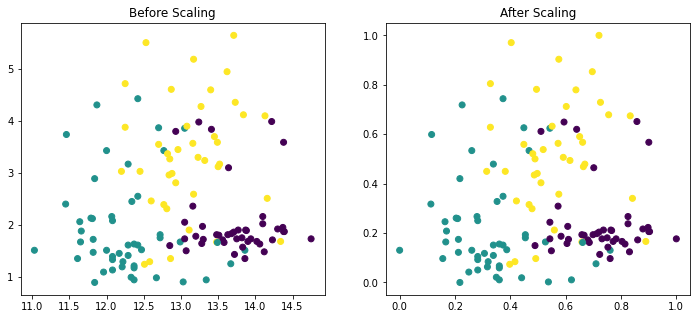

In [16]:
# Graphical illustration of 'X_train' and 'X_train_scaled', 
# Points are almost identical in both graphs, but the values of scale in both graphs have so much difference.
# Now, the data points are squeezed between 0 and 1 of both axis.

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize = (12,5))

ax1.scatter(X_train['Alcohol'], X_train['Malic Acid'], c=y_train)
ax1.set_title('Before Scaling')

ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic Acid'], c=y_train)
ax2.set_title('After Scaling')